<a href="https://colab.research.google.com/github/Pakhi27/Unemployement-in-India-Linear-Regression-Random-Forest/blob/main/Unemployement_in_India_Linear_Regression_%26_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [ ]:
df=pd.read_csv('Unemployment in India.csv')


In [ ]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1=pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

In [ ]:
df1

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [ ]:
print(df1.columns.tolist())


['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Longitude', 'Latitude']


In [ ]:
# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()
df1.columns = df1.columns.str.strip()

In [ ]:
# Convert 'Date' columns to datetime format
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')
df1['Date'] = pd.to_datetime(df1['Date'],errors='coerce')

<ipython-input-56-defa2fae40d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'],errors='coerce')


In [ ]:
# Drop the duplicate 'Region.1' column from the 2020 data
# df1 = df1.drop(columns=['Region.1'])

# Rename columns if necessary for consistency
df1.rename(columns={'longitude': 'Longitude', 'latitude': 'Latitude'}, inplace=True)

# Add Longitude and Latitude columns to 2019 data with NaN values
df['Longitude'] = pd.NA
df['Latitude'] = pd.NA

# Reorder columns to match 2020 data structure
df = df[df1.columns]

# Concatenate the 2019 and 2020 data
combined_data = pd.concat([df, df1], ignore_index=True)

# Inspect the combined dataset
print("\nCombined Data:")
print(combined_data.head())
print(combined_data.info())



Combined Data:
           Region       Date Frequency  Estimated Unemployment Rate (%)  \
0  andhra pradesh 2019-05-31   monthly                             3.65   
1  andhra pradesh 2019-06-30   monthly                             3.05   
2  andhra pradesh 2019-07-31   monthly                             3.75   
3  andhra pradesh 2019-08-31   monthly                             3.32   
4  andhra pradesh 2019-09-30   monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)  Longitude  \
0          11999139.0                                    43.24        NaN   
1          11755881.0                                    42.05        NaN   
2          12086707.0                                    43.50        NaN   
3          12285693.0                                    43.97        NaN   
4          12256762.0                                    44.68        NaN   

   Latitude  
0       NaN  
1       NaN  
2       NaN  
3       NaN  


<ipython-input-57-414b720486e4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Longitude'] = pd.NA
<ipython-input-57-414b720486e4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Latitude'] = pd.NA


In [ ]:
combined_data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Longitude,Latitude
0,andhra pradesh,2019-05-31,monthly,3.65,11999139.0,43.24,NaN,NaN
1,andhra pradesh,2019-06-30,monthly,3.05,11755881.0,42.05,NaN,NaN
2,andhra pradesh,2019-07-31,monthly,3.75,12086707.0,43.50,NaN,NaN
3,andhra pradesh,2019-08-31,monthly,3.32,12285693.0,43.97,NaN,NaN
4,andhra pradesh,2019-09-30,monthly,5.17,12256762.0,44.68,NaN,NaN
...,...,...,...,...,...,...,...,...
1030,West Bengal,2020-06-30,M,7.29,30726310.0,40.39,22.9868,87.855
1031,West Bengal,2020-07-31,M,6.83,35372506.0,46.17,22.9868,87.855
1032,West Bengal,2020-08-31,M,14.87,33298644.0,47.48,22.9868,87.855
1033,West Bengal,2020-09-30,M,9.35,35707239.0,47.73,22.9868,87.855


In [ ]:
# Exploratory Data Analysis

In [ ]:
# Missing values

In [ ]:
combined_data.isnull().sum()

Region                                       0
Date                                        28
Frequency                                    0
Estimated Unemployment Rate (%)             28
Estimated Employed                          28
Estimated Labour Participation Rate (%)     28
Longitude                                  768
Latitude                                   768
dtype: int64

In [ ]:
# Drop Longitude and Latitude columns
combined_data = combined_data.drop(columns=['Longitude', 'Latitude'])


In [ ]:
# Fill null values with 0
combined_data['Region'] = combined_data['Region'].fillna('Unknown')
combined_data['Date'] = combined_data['Date'].fillna(method='ffill')  # Forward fill date if it makes sense
combined_data['Frequency'] = combined_data['Frequency'].fillna(method='ffill')
combined_data['Estimated Unemployment Rate (%)'] = combined_data['Estimated Unemployment Rate (%)'].fillna(0)
combined_data['Estimated Employed'] = combined_data['Estimated Employed'].fillna(0)
combined_data['Estimated Labour Participation Rate (%)'] = combined_data['Estimated Labour Participation Rate (%)'].fillna(0)


In [ ]:
# Preprocessing

In [ ]:
# Convert to lower case
# Ensure that all entries are strings before applying lower
combined_data['Region'] = combined_data['Region'].astype(str).str.lower()
combined_data['Frequency'] = combined_data['Frequency'].astype(str).str.lower()

print(combined_data.head())


           Region       Date Frequency  Estimated Unemployment Rate (%)  \
0  andhra pradesh 2019-05-31   monthly                             3.65   
1  andhra pradesh 2019-06-30   monthly                             3.05   
2  andhra pradesh 2019-07-31   monthly                             3.75   
3  andhra pradesh 2019-08-31   monthly                             3.32   
4  andhra pradesh 2019-09-30   monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)  
0          11999139.0                                    43.24  
1          11755881.0                                    42.05  
2          12086707.0                                    43.50  
3          12285693.0                                    43.97  
4          12256762.0                                    44.68  


In [ ]:
# Removing stop words

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

stop_words = stopwords.words('english')

def remove_stopwords(text):
  words = text.lower().split()  # Tokenize and lowercase
  filtered_words = [word for word in words if word not in stop_words]
  return ' '.join(filtered_words)

combined_data['Region'] = combined_data['Region'].apply(remove_stopwords)
combined_data['Frequency'] = combined_data['Frequency'].apply(remove_stopwords)

In [ ]:
# Removing Whitespaces
combined_data['Region'] = combined_data['Region'].apply(lambda text: text.strip())
combined_data['Frequency'] = combined_data['Frequency'].apply(lambda text: text.strip())
combined_data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
0,andhra pradesh,2019-05-31,monthly,3.65,11999139.0,43.24
1,andhra pradesh,2019-06-30,monthly,3.05,11755881.0,42.05
2,andhra pradesh,2019-07-31,monthly,3.75,12086707.0,43.50
3,andhra pradesh,2019-08-31,monthly,3.32,12285693.0,43.97
4,andhra pradesh,2019-09-30,monthly,5.17,12256762.0,44.68
...,...,...,...,...,...,...
1030,west bengal,2020-06-30,,7.29,30726310.0,40.39
1031,west bengal,2020-07-31,,6.83,35372506.0,46.17
1032,west bengal,2020-08-31,,14.87,33298644.0,47.48
1033,west bengal,2020-09-30,,9.35,35707239.0,47.73


In [ ]:
# Feature Engineering
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_features = vectorizer.fit_transform(combined_data['Region'] )
tfidf_features = vectorizer.fit_transform(combined_data['Frequency'])
tfidf_features

<1035x2 sparse matrix of type '<class 'numpy.float64'>'
	with 768 stored elements in Compressed Sparse Row format>

In [ ]:

tfidf_features

<1035x2 sparse matrix of type '<class 'numpy.float64'>'
	with 768 stored elements in Compressed Sparse Row format>

In [ ]:
#Change year object to integer
# combined_data.loc[:,'Date']=combined_data.loc[:,'Date'].astype(int)

In [ ]:
numeric_data = combined_data.select_dtypes(include=['number'])

In [ ]:
combined_data['Date'] = pd.to_datetime(combined_data['Date'], errors='coerce')

In [ ]:
print(combined_data.dtypes)

Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                float64
Estimated Labour Participation Rate (%)           float64
dtype: object


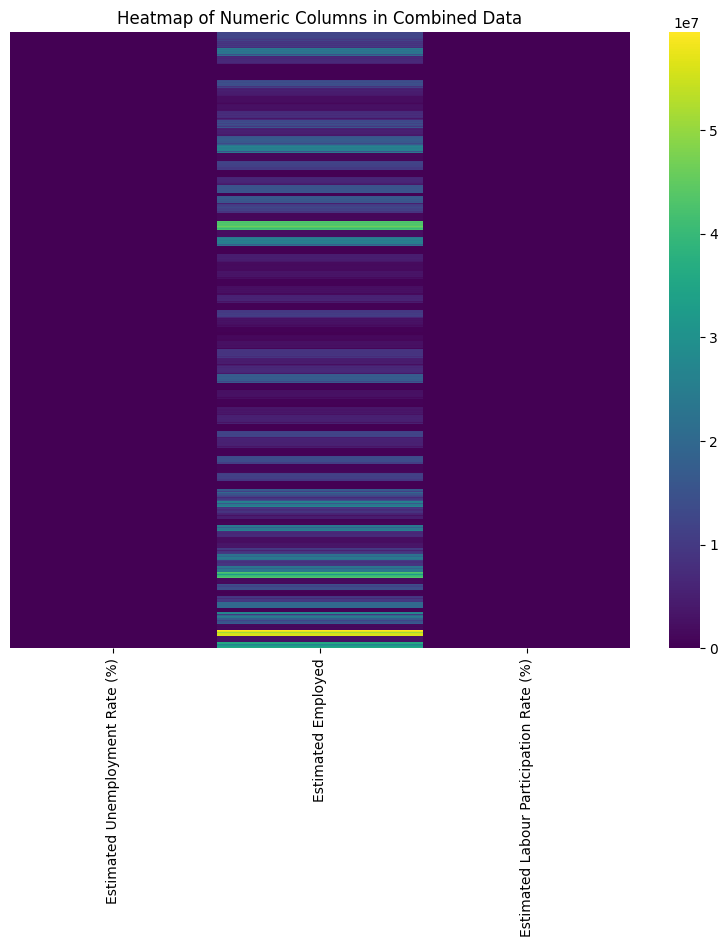

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data, yticklabels=False, cbar=True, cmap='viridis')
plt.title('Heatmap of Numeric Columns in Combined Data')
plt.show()


In [ ]:
combined_data.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
dtype: int64

In [ ]:
null_values_in_date = combined_data['Date'].isnull().sum()
null_values_in_date

0

In [ ]:
null_values_in_estimated_employes = combined_data['Estimated Employed'].isnull().sum()
null_values_in_estimated_employes

0

In [ ]:
# Plots

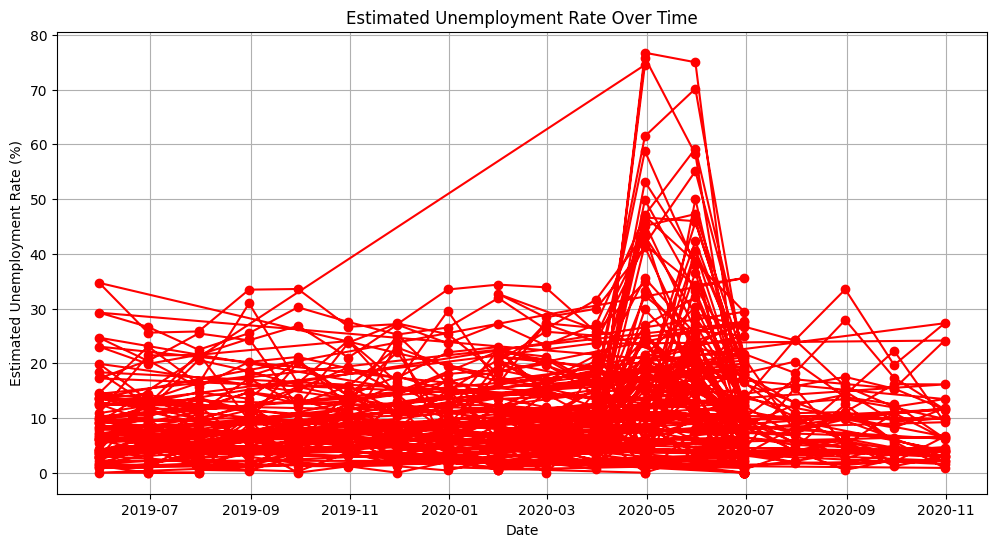

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(combined_data['Date'], combined_data['Estimated Unemployment Rate (%)'], marker='o',color='red')
plt.title('Estimated Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.grid(True)
plt.show()

<ipython-input-91-e930731fa4f2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data=combined_data, estimator='mean', palette='coolwarm')


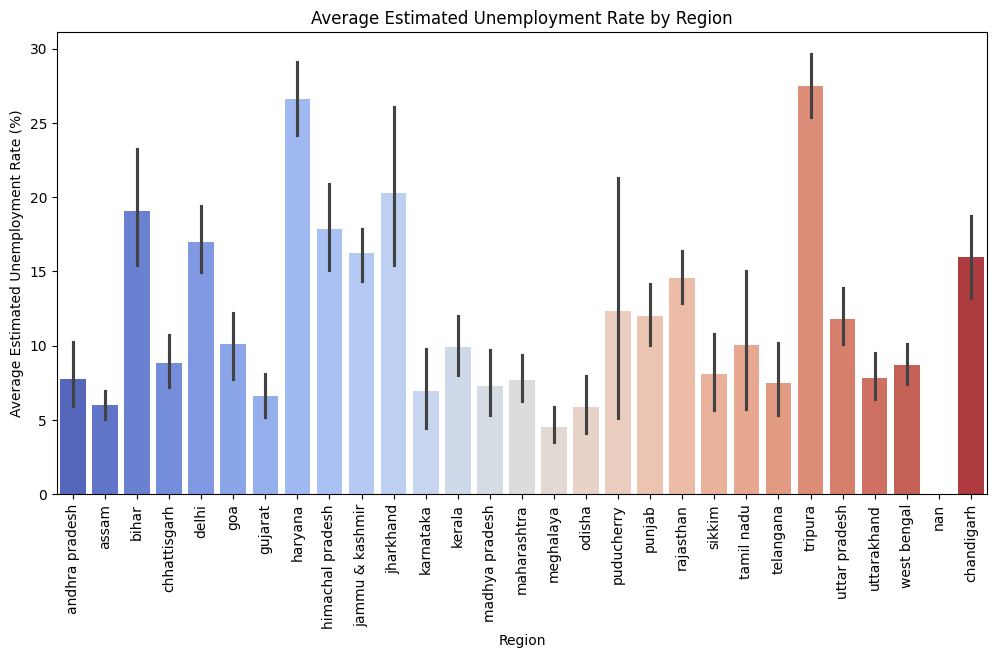

In [ ]:
# Average Estimated Unemployment Rate by Region
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data=combined_data, estimator='mean', palette='coolwarm')
plt.title('Average Estimated Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Average Estimated Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.show()

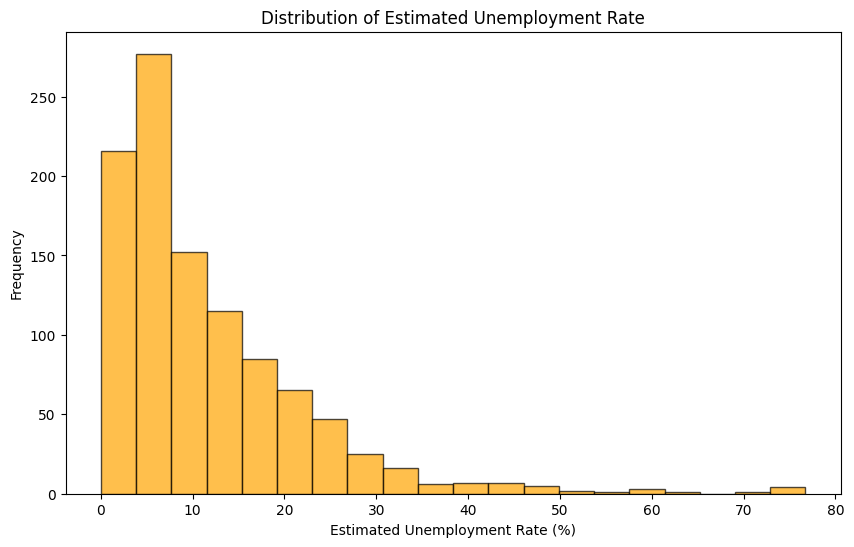

In [ ]:
# To visualize the distribution of a single numerical variable.
plt.figure(figsize=(10, 6))
plt.hist(combined_data['Estimated Unemployment Rate (%)'].dropna(), bins=20, edgecolor='k', alpha=0.7, color='orange')
plt.title('Distribution of Estimated Unemployment Rate')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()


<ipython-input-94-cb3827fdc30b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)', data=combined_data,palette='Set2')


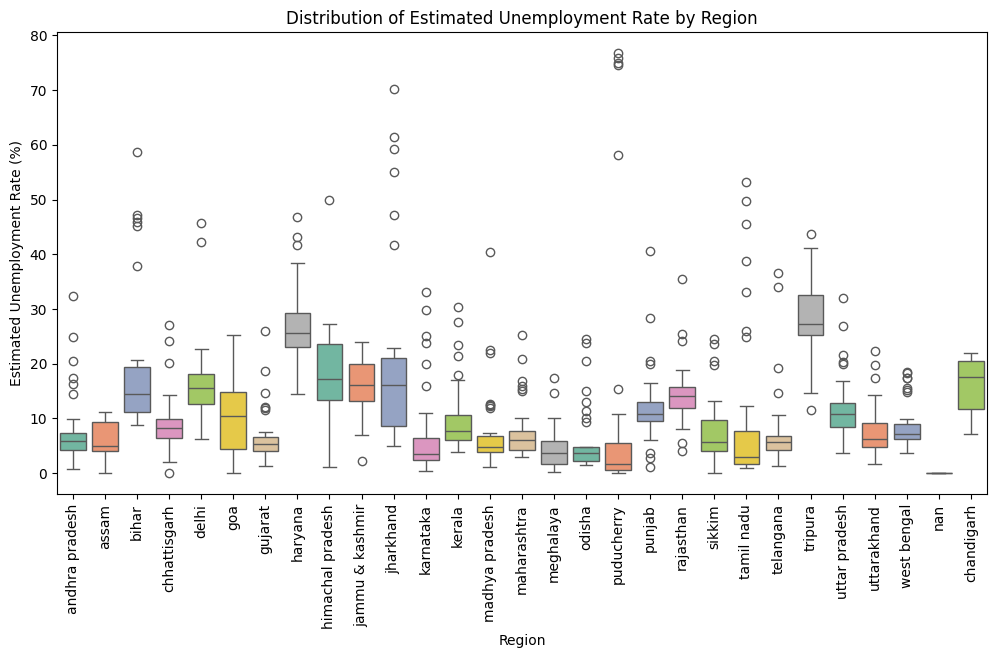

In [ ]:
# Box Plot
# To visualize the distribution and identify outliers.
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)', data=combined_data,palette='Set2')
plt.title('Distribution of Estimated Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.show()



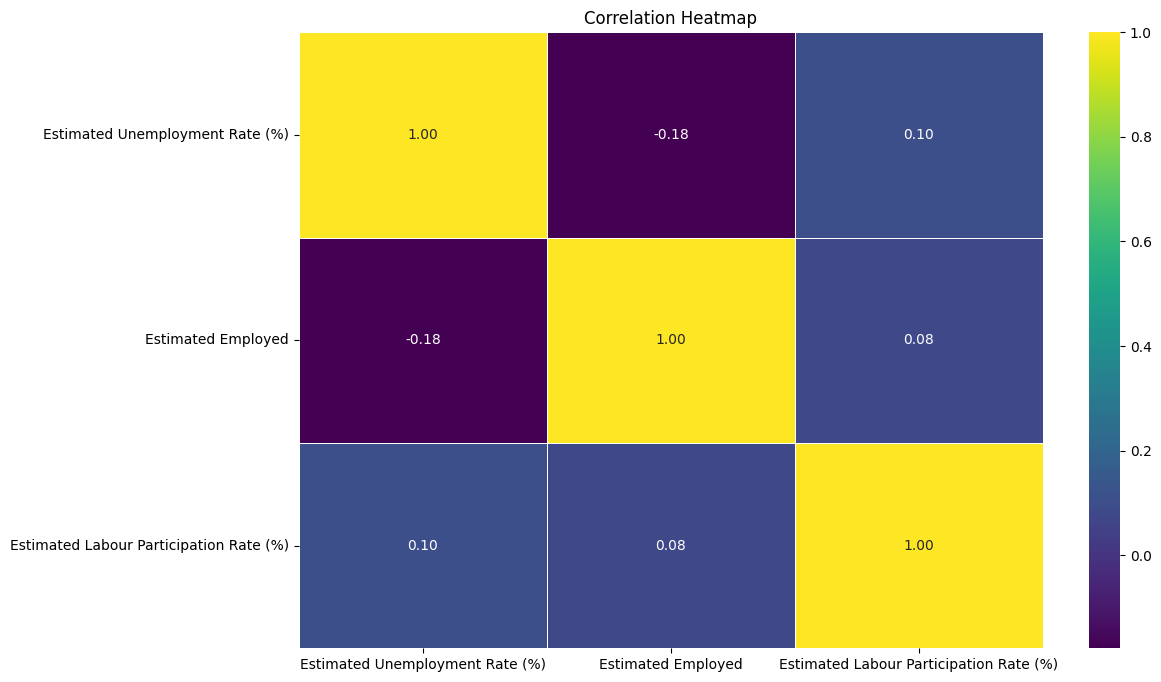

In [ ]:
# correlation matrix
# heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = combined_data[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


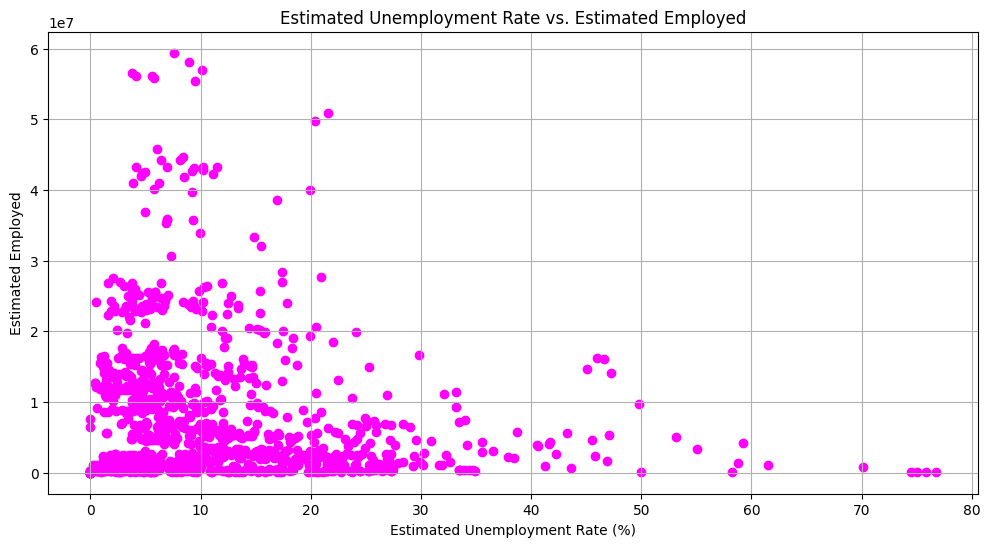

In [ ]:
# : To visualize relationships between two numerical variables.
# scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(combined_data['Estimated Unemployment Rate (%)'], combined_data['Estimated Employed'], color='magenta')
plt.title('Estimated Unemployment Rate vs. Estimated Employed')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Estimated Employed')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been as

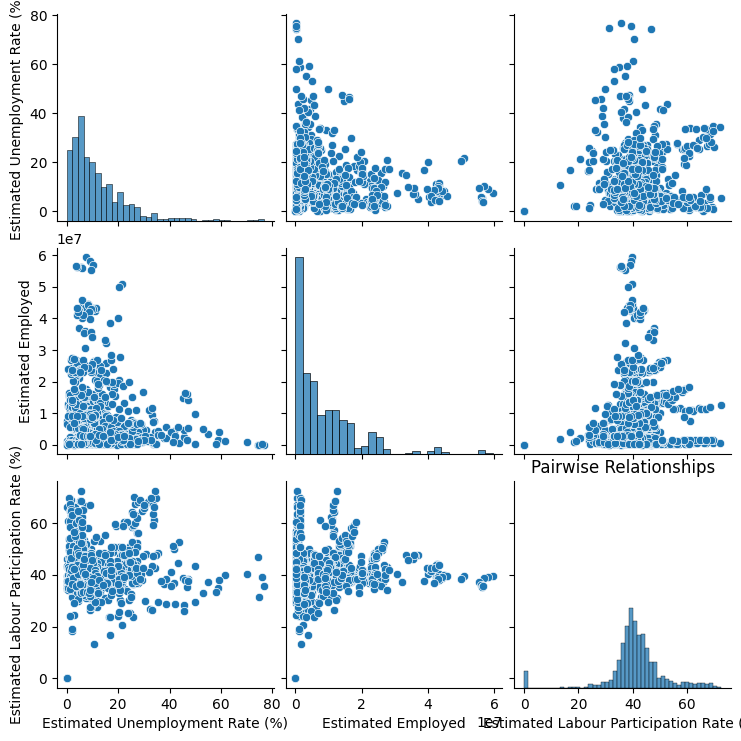

In [ ]:
# Pair Plot
# Purpose: To visualize pairwise relationships in the dataset.
sns.pairplot(combined_data[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']],palette='hue')
plt.title('Pairwise Relationships')
plt.show()


<ipython-input-104-5f2a240368c2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=combined_data,palette='viridis')


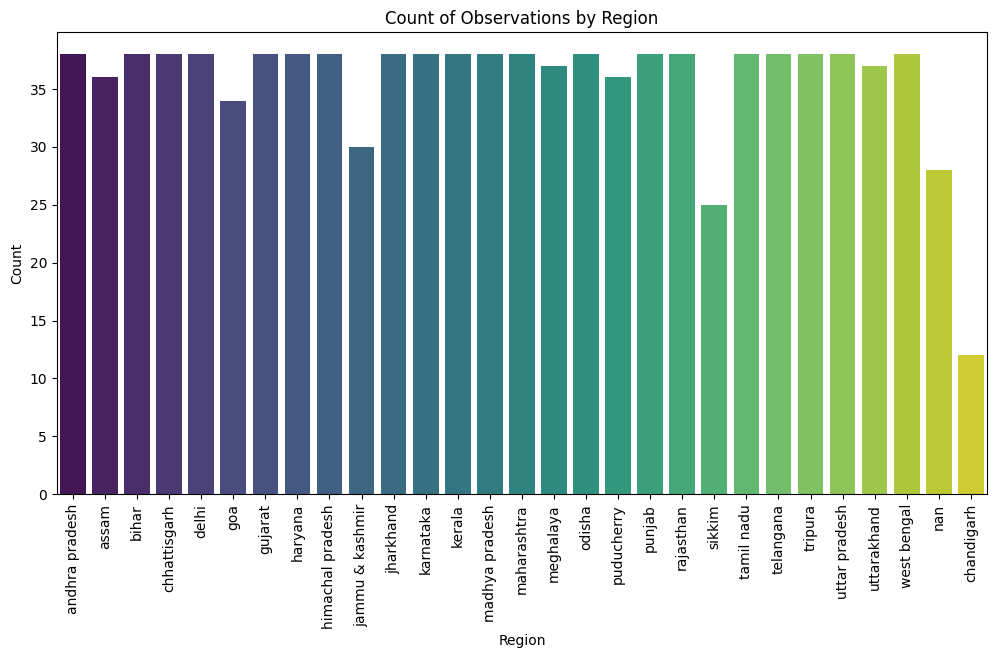

In [ ]:
# Count Plot
# Purpose: To visualize the count of observations in each category.
plt.figure(figsize=(12, 6))
sns.countplot(x='Region', data=combined_data,palette='viridis')
plt.title('Count of Observations by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [ ]:
combined_data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
0,andhra pradesh,2019-05-31,monthly,3.65,11999139.0,43.24
1,andhra pradesh,2019-06-30,monthly,3.05,11755881.0,42.05
2,andhra pradesh,2019-07-31,monthly,3.75,12086707.0,43.50
3,andhra pradesh,2019-08-31,monthly,3.32,12285693.0,43.97
4,andhra pradesh,2019-09-30,monthly,5.17,12256762.0,44.68
...,...,...,...,...,...,...
1030,west bengal,2020-06-30,,7.29,30726310.0,40.39
1031,west bengal,2020-07-31,,6.83,35372506.0,46.17
1032,west bengal,2020-08-31,,14.87,33298644.0,47.48
1033,west bengal,2020-09-30,,9.35,35707239.0,47.73


In [ ]:
# Train-Test Split

In [ ]:
# Define your preprocessing steps
numerical_cols = [ 'Estimated Employed', 'Estimated Labour Participation Rate (%)']
categorical_cols = ['Region', 'Frequency']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
# Apply TF-IDF Vectorization to categorical columns
tfidf = TfidfVectorizer()
tfidf_features = tfidf.fit_transform(df['Frequency'])

In [ ]:
tfidf_features

<768x2 sparse matrix of type '<class 'numpy.float64'>'
	with 768 stored elements in Compressed Sparse Row format>

In [ ]:
from scipy.sparse import csr_matrix

# Convert numerical features DataFrame to sparse matrix
numerical_features_sparse = csr_matrix(df[numerical_cols].values)


In [ ]:
# Combine TF-IDF features with the rest of the features
from scipy.sparse import hstack
X = hstack([df[numerical_cols], tfidf_features])

In [ ]:
X.shape

(768, 4)

In [ ]:
y=combined_data['Estimated Unemployment Rate (%)']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Create numerical transformer
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Assuming 'categorical_features' is a list of your categorical column names
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
# Create preprocessor that applies transformations to both numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

In [ ]:

# Define the full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [ ]:
# Prepare the features
X = combined_data[numerical_cols + categorical_cols]

In [ ]:
print(X.shape)
print(y.shape)


(1035, 4)
(1035,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(828, 4)
(207, 4)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(828,)
(207,)


In [ ]:
# Linear Regression Model

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
pipeline.fit(X_train,y_train)
# mse=cross_val_score(Regressor,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Estimated Employed',
                                                   'Estimated Labour '
                                                   'Participation Rate (%)']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Region', 'Frequency'])])),
                ('model', LinearRegression())])

In [ ]:
cv_scores = cross_val_score(pipeline, X_train, y_train, scoring='neg_mean_squared_error', cv=10)

In [ ]:
# Make predictions
y_pred = pipeline.predict(X_test)

In [ ]:
y_pred

array([3.78283724e+00, 1.71017329e+01, 1.18788003e+01, 1.88262130e+01,
       7.63253581e+00, 1.64781964e-05, 1.51181888e+01, 1.04777474e+01,
       1.26066770e+01, 3.01856077e+00, 2.06977383e+01, 1.64781964e-05,
       5.70393155e+00, 8.14185783e+00, 7.29914687e+00, 1.32099325e+01,
       1.34162538e+01, 1.69704330e+01, 1.21489156e+01, 1.26282477e+01,
       2.04042734e+01, 7.74916479e+00, 1.30771533e+01, 1.52324650e+01,
       1.34389220e+01, 2.31570125e+01, 4.60961691e+00, 1.64781964e-05,
       1.87435447e+01, 2.56276124e+01, 1.00136624e+01, 3.00260933e+00,
       7.86925777e+00, 2.39728326e+00, 1.41136868e+01, 1.23259019e+01,
       2.05666140e+01, 7.39917697e+00, 5.10549266e+00, 6.86400343e+00,
       2.68080797e+01, 7.94972797e+00, 5.80223726e+00, 9.60167466e+00,
       6.49636439e+00, 1.23180057e+01, 9.53111716e+00, 7.24731150e+00,
       1.71024828e+01, 7.97448218e+00, 9.89945800e+00, 8.62000835e+00,
       5.59151269e+00, 2.84016825e+01, 9.94125462e+00, 4.91423817e+00,
      

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
r2=r2_score(y_test,y_pred)
r2

0.4275884442810174

In [ ]:
# Random Forest Model

In [ ]:

from sklearn.ensemble import RandomForestRegressor

In [ ]:
regressor = RandomForestRegressor()

In [ ]:

# Define the full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model',regressor)
])

In [ ]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Estimated Employed',
                                                   'Estimated Labour '
                                                   'Participation Rate (%)']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Region', 'Frequency'])])),
                ('model', RandomForestRegressor())])

In [ ]:
y_pred=pipeline.predict(X_test)

In [ ]:
y_pred

array([ 5.386 , 22.559 , 14.1186,  9.3128,  4.5748,  0.    , 19.6881,
        7.009 ,  4.1823,  2.7454, 22.6038,  0.    ,  5.3948,  9.1325,
        6.5407, 11.1032,  3.6302, 16.3842, 12.2842,  5.9875, 15.8099,
        5.3379,  2.5813, 16.9125,  1.3151,  6.7394,  6.4115,  0.    ,
       18.4968, 25.2608, 11.2696,  2.3295,  9.2144,  1.0284, 13.2464,
       14.1602, 20.6307, 14.5174,  6.2525,  9.5582, 29.5967,  5.1144,
        3.8943,  7.9281,  5.109 ,  9.8613,  3.6358,  8.1266, 15.076 ,
        9.7502, 17.1524, 13.8494,  6.4207, 26.4088,  9.0611,  8.0141,
        1.5315, 16.3247,  7.535 , 16.9727, 10.2038,  6.1371,  4.4489,
       10.3183,  5.9593,  4.1611, 32.1576,  9.4821,  4.2506,  3.2409,
       14.968 , 15.497 ,  4.5837, 27.4279, 28.6137,  5.1101,  6.0802,
        9.6089, 16.4665,  8.1528,  6.4222, 12.6891,  5.1352,  5.0711,
        1.3113, 22.5045,  4.8114,  4.8851,  8.9021,  3.6577,  7.5651,
        0.9397,  5.461 ,  0.    , 23.4131, 14.9034,  5.2007, 26.8794,
       16.1793,  4.4

In [ ]:
r2=r2_score(y_test,y_pred)
r2

0.7348713976272147

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Define the parameter grid for RandomForestRegressor
param_grid = {
    'model__n_estimators': [100, 200],  # Number of trees in the forest
    'model__max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
    'model__max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'model__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'model__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'model__bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

# Evaluate on the test set
y_pred = grid_search.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R2 Score on Test Set: {r2}")


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'model__bootstrap': False, 'model__max_depth': 30, 'model__max_features': 'log2', 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 100}
Best Cross-Validation Score: 0.47641995460466974
R2 Score on Test Set: 0.7087356139021138


In [ ]:
# Ridge Regression
# Ridge to remove overfitting

In [ ]:

from sklearn.linear_model import Ridge

In [ ]:
ridge_regressor=Ridge()

In [ ]:

# Define the full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model',ridge_regressor)
])

In [ ]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Estimated Employed',
                                                   'Estimated Labour '
                                                   'Participation Rate (%)']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Region', 'Frequency'])])),
                ('model', Ridge())])

In [ ]:
y_pred=pipeline.predict(X_test)

In [ ]:
y_pred

array([ 4.25864341, 16.88024322, 11.8938185 , 18.66091049,  7.62103778,
        0.36442074, 15.15597691, 10.21734118, 12.76244788,  3.46518514,
       20.25114664,  0.36442074,  5.87759638,  7.99400425,  7.32463846,
       13.23373212, 13.4622588 , 16.90818647, 12.13329458, 12.66658868,
       19.57497964,  7.8341184 , 13.16395441, 15.18301154, 13.47723217,
       22.5703978 ,  4.86798644,  0.36442074, 18.27506867, 25.28461425,
       10.18763266,  3.45219443,  7.73057162,  2.92536691, 13.82371918,
       12.31477264, 20.33507398,  7.37500876,  5.44789032,  6.93279526,
       26.39602342,  8.06791133,  6.03300885,  9.76949151,  6.70603561,
       12.35190009,  9.46655684,  7.49821457, 16.95710876,  8.19139858,
       10.02359123,  8.78726436,  6.0916894 , 27.95829727, 10.11694617,
        5.13178307, 13.48161929, 10.20902237,  7.67569472, 13.87318357,
       12.53248011, 16.13141744,  7.85362396,  7.82605782,  9.3872795 ,
        4.31990462, 24.11179101,  8.72734208,  7.42206974,  7.00

In [ ]:
r2=r2_score(y_test,y_pred)
r2

0.4250903811502619

In [ ]:
# Gradient Boosting Regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model = GradientBoostingRegressor()

In [ ]:
# Define the full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

In [ ]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Estimated Employed',
                                                   'Estimated Labour '
                                                   'Participation Rate (%)']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Region', 'Frequency'])])),
                ('model', GradientBoostingRegressor())])

In [ ]:
y_pred=pipeline.predict(X_test)

In [ ]:
r2=r2_score(y_test,y_pred)
r2

0.715138398686938